## 1、从Keras中导入数据集
加载Keras中的MNIST数据集

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 2、数据预处理
将train_images转换为一个(60000, 28 * 28)的张量，并且每个数值在[0, 1]区间  
将test_images转换为一个(10000, 28 * 28)的张量，并且每个数值在[0, 1]区间

In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 3、准备标签数据

In [3]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 4、构建神经网络
构建一个只有两个隐藏层的全连接神经网络  
第一个隐藏层有512个神经元,激活函数relu  
第二个隐藏层有10个神经元,激活函数softmax,对应数字0-9

* 层是一种数据处理模块，可以看做是一种数据过滤器，进去一些数据，出来的数据变得更加有用  
* 层从输入数据中提取表示

In [4]:
from keras import models, layers 

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

In [5]:
#查看网络中的参数
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


绘制网络模型

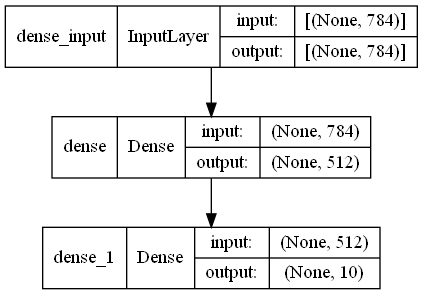

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(network, show_shapes = True, to_file = '手写辨识.png')

## 5、网络编译
选择网络的优化器、损失函数、度量

In [7]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

## 6、拟合模型

In [8]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2597 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9890


## 7、在验证集上查看网络的性能

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 614us/step - loss: 0.0639 - accuracy: 0.9816


In [10]:
print(f"test_loss : {test_loss}")
print(f"test_acc : {test_acc}")

test_loss : 0.06393778324127197
test_acc : 0.9815999865531921
